In [21]:
import pandas as pd
import re

# Read the list of filenames from the configuration file
with open('file_list.txt', 'r', encoding='utf-8') as config_file:
    file_names = config_file.read().splitlines()

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'


# Initialize an empty list to store parsed data
datalist = []
stream_count = 0
# Iterate over each specified file
for file in file_names:
    full_path = file
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                datalist.append([date, user, message,stream_count])
    stream_count = stream_count + 1

# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message","stream"])

data['date'] = pd.to_datetime(data['date'])

data = data.sort_values(by=['user', 'date'])

#data2 = data[data['user'] == '1206paul_']
#data2 = data[data['user'] == 'balintboss']
#data2 = data[data['user'] == 'klimzaa']
#data2 = data[data['user'] == 'Martin_Gales']
#data2 = data[data['user'] == 'IvanOnMyOwn']
data2 = data[data['user'] == 'Trizze']
#data2 = data[data['user'] == 'MatthewTheTaxCollector']




# Calculate the total number of messages per stream
total_messages_per_stream = data2['stream'].value_counts()

# Combine the results into a single DataFrame
stream_stats = pd.DataFrame({
    'total_messages': total_messages_per_stream
})

# Calculate the time difference between the first and last messages for each stream
watch_lengths = data2.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['watch_length'] = watch_lengths

# Calculate the time difference between the first and last messages for each stream
stream_lengths = data.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['stream_length'] = stream_lengths

stream_stats.head(10)

,total_messages,watch_length,stream_length
stream,,,
24,140,22607.0,26365.0
59,128,14162.0,17193.0
55,90,5478.0,21630.0
31,85,12504.0,18576.0
40,82,18246.0,20767.0
34,65,19142.0,22676.0
29,60,10267.0,11040.0
5,58,11038.0,20382.0
38,57,12590.0,27145.0


In [22]:
stream_stats.describe()

,total_messages,watch_length,stream_length
count,42.000000,42.000000,42.000000
mean,34.785714,6872.642857,19415.309524
std,32.856329,6661.974606,4870.792716
min,1.000000,0.000000,9311.000000
25%,10.250000,1048.000000,17287.500000
50%,25.000000,4162.500000,18575.000000
75%,48.750000,12380.250000,21255.250000
max,140.000000,22607.000000,36105.000000


In [23]:
stream_stats['watch_length_in_hour'] = stream_stats['watch_length'] / 60 /60
stream_stats['stream_length_in_hour'] = stream_stats['stream_length'] / 60 /60

stream_stats.head(5)

,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour
stream,,,,,
24,140,22607.0,26365.0,6.279722,7.323611
59,128,14162.0,17193.0,3.933889,4.775833
55,90,5478.0,21630.0,1.521667,6.008333
31,85,12504.0,18576.0,3.473333,5.160000
40,82,18246.0,20767.0,5.068333,5.768611


In [24]:
stream_stats['persenteg'] = stream_stats['watch_length'] / stream_stats['stream_length'] * 100

stream_stats.head(5)



,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
stream,,,,,,
24,140,22607.0,26365.0,6.279722,7.323611,85.746255
59,128,14162.0,17193.0,3.933889,4.775833,82.370732
55,90,5478.0,21630.0,1.521667,6.008333,25.325936
31,85,12504.0,18576.0,3.473333,5.160000,67.312661
40,82,18246.0,20767.0,5.068333,5.768611,87.860548


In [25]:
stream_stats['persenteg'].describe()

count    42.000000
mean     35.542646
std      33.807231
min       0.000000
25%       6.010803
50%      17.910386
75%      66.063562
max      98.687703
Name: persenteg, dtype: float64

In [26]:
stream_stats = stream_stats.sort_values(by='persenteg')

stream_stats.head(10)


,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
stream,,,,,,
21,1,0.0,17472.0,0.000000,4.853333,0.000000
54,1,0.0,17785.0,0.000000,4.940278,0.000000
18,1,0.0,15531.0,0.000000,4.314167,0.000000
4,8,115.0,18734.0,0.031944,5.203889,0.613857
0,5,175.0,17697.0,0.048611,4.915833,0.988868
16,10,205.0,18574.0,0.056944,5.159444,1.103693
26,6,655.0,36105.0,0.181944,10.029167,1.814153
13,11,696.0,21235.0,0.193333,5.898611,3.277608
17,17,689.0,14719.0,0.191389,4.088611,4.681025


In [27]:
stream_stats['watch_length_in_hour'].sum() /24

3.3408680555555557

In [28]:
stream_stats = stream_stats.reset_index()
stream_stats = stream_stats.sort_values(by='stream')

stream_stats.head(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
4,0,5,175.0,17697.0,0.048611,4.915833,0.988868
18,1,28,2399.0,17831.0,0.666389,4.953056,13.454097
28,2,48,11025.0,19147.0,3.062500,5.318611,57.580822
11,3,10,1054.0,17451.0,0.292778,4.847500,6.039768
3,4,8,115.0,18734.0,0.031944,5.203889,0.613857
27,5,58,11038.0,20382.0,3.066111,5.661667,54.155628
16,7,28,2262.0,17773.0,0.628333,4.936944,12.727170
17,8,4,2393.0,18686.0,0.664722,5.190556,12.806379
32,9,23,12009.0,16418.0,3.335833,4.560556,73.145328
41,11,40,20079.0,20346.0,5.577500,5.651667,98.687703


In [29]:
stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
29,41,42,14463.0,24536.0,4.017500,6.815556,58.946038
15,43,46,2475.0,21262.0,0.687500,5.906111,11.640485
20,44,26,3263.0,20792.0,0.906389,5.775556,15.693536
9,45,13,471.0,9311.0,0.130833,2.586389,5.058533
13,46,17,1226.0,15420.0,0.340556,4.283333,7.950713
14,53,22,2384.0,29431.0,0.662222,8.175278,8.100302
1,54,1,0.0,17785.0,0.000000,4.940278,0.000000
22,55,90,5478.0,21630.0,1.521667,6.008333,25.325936
34,58,24,13491.0,17445.0,3.747500,4.845833,77.334480
35,59,128,14162.0,17193.0,3.933889,4.775833,82.370732


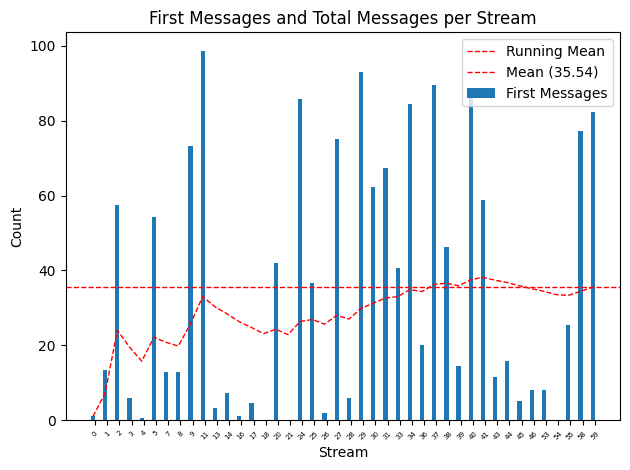

In [30]:
import matplotlib.pyplot as plt


# Plot the chart
fig, ax = plt.subplots()

# Bar width
bar_width = 0.35

# Bar positions
index = range(len(stream_stats))

# Bar plots
bar1 = ax.bar(index, stream_stats['persenteg'], bar_width, label='First Messages')

# Calculate mean of first messages
persenteg_messages = stream_stats['persenteg'].mean()

stream_stats['persenteg_avg'] = stream_stats['persenteg'].expanding().mean()

# Plot the running mean line
ax.plot(index, stream_stats['persenteg_avg'], color='r', linestyle='--', linewidth=1, label='Running Mean')

# Draw the mean line
ax.axhline(persenteg_messages, color='r', linestyle='--', linewidth=1, label=f'Mean ({persenteg_messages:.2f})')

# Labels and title
ax.set_xlabel('Stream', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('First Messages and Total Messages per Stream', fontsize=12)
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(stream_stats['stream'], fontsize=5)  # Adjust x-tick labels font size
ax.legend(fontsize=10)

# Display the plot
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()
